<div>
    <h1 style="text-align: center">Facultad de Ciencias UNAM</h1>
    <h3 style="text-align: center">---=== Física Computacional ===---</h3>
    <h4 style="text-align: center">Dr. José Eduardo González Mireles, Dra. Gabriela Berenice Díaz Cortés</h4>
    <h4 style="text-align: center">Alumno: Luis Fernando Núñez Rangel</h4>
    <p style="text-align: center">Tarea 2</p>
</div>

#### 1. Escribe una función my_max(x) que dé como salida el valor máximo (más grande) de una lista x

No use la función de Python `max` ni librerías.
Encuentra el máximo de la siguiente lista:

In [1]:
x = [10, 56, 258, 16, 24, 18, 265, 893, 52, 39, 82]

In [ ]:
def my_max(numbers: list) -> float: 
    """
    Find the maximum element in a list using linear search algorithm.
    
    This function implements a basic maximum-finding algorithm without using
    Python's built-in max() function. It uses a single pass through the list
    with O(n) time complexity.

    Args:
        numbers (list[int]): List of numeric values to search.
    
    Returns:
        float: The maximum value found in the list.
               Returns float type for compatibility with downstream calculations.

    Raises:
        ValueError: If the input list is empty.
        
    Algorithm:
        1. Validate input list is not empty
        2. Initialize max_number with first element
        3. Iterate through remaining elements
        4. Update max_number if larger value found
        5. Return final maximum value
        
    Complexity:
        Time: O(n) where n is the length of the list
        Space: O(1) - constant space usage
    """
    # Input validation
    if not numbers:
        raise ValueError("Input list cannot be empty.")

    # Initialize maximum with first element
    max_number = numbers[0]
    
    # Linear search for maximum value
    for number in numbers[1:]:
        if number > max_number:
            max_number = number
    
    return max_number

In [3]:
# Opteniendo el número máximo de x
my_max(x)

893

### 2. Conversor de Temperaturas.

Pide al usuario que ingrese una temperatura en °C.
Haz una función que converta esa temperatura a °F usando la fórmula:

$ F = C \times \frac{9}{5} + 32 ,$

y muestre el resultado con un mensaje claro redondeando a 2 decimales.


In [ ]:
def celcius_to_farenheit(celcius: float) -> float:
    """
    Convert temperature from Celsius to Fahrenheit scale.
    
    Applies the standard thermodynamic conversion formula between
    Celsius and Fahrenheit temperature scales.

    Args:
        celcius (float): Temperature in degrees Celsius (°C).
    
    Returns:
        float: Temperature converted to degrees Fahrenheit (°F),
               rounded to 2 decimal places for practical precision.

    Raises:
        ValueError: If the input temperature value is None.
        
    Formula:
        F = C × (9/5) + 32
        
    Physical Reference Points:
        - Water freezing point: 0°C = 32°F
        - Water boiling point: 100°C = 212°F
        - Absolute zero: -273.15°C = -459.67°F
        
    Example:
        >>> celcius_to_farenheit(0)
        32.0
        >>> celcius_to_farenheit(100)
        212.0
    """
    # Input validation
    if not celcius: 
        raise ValueError("Temperature value must be provided for conversion")
    
    # Apply conversion formula and round to 2 decimal places
    return round(celcius * (9/5) + 32, 2)

In [5]:
print(f"{0} °C -> {celcius_to_farenheit(0)} °F")
print(f"{-32} °C -> {celcius_to_farenheit(-32)} °F")
print(f"{32} °C -> {celcius_to_farenheit(32)} °F")
print(f"{50} °C -> {celcius_to_farenheit(50)} °F")
print(f"{100} °C -> {celcius_to_farenheit(100)} °F")

0 °C -> 32.0 °F
-32 °C -> -25.6 °F
32 °C -> 89.6 °F
50 °C -> 122.0 °F
100 °C -> 212.0 °F


### 3. Escribe un script en Python que calcule la posición de un objeto en caída libre, considerando la ecuación:

$y(t) = y_0 + v_0 t - \frac{1}{2}gt^2$

Para esto:
- Define una función `posicion(y0, v0, t, g)` que devuelva la posición en función del tiempo y la velocidad inicial.
- Calcula las posiciones para valores de tiempo entre 0 y 10 s con incrementos de 0.5 s.
- Considera **5 diferentes velocidades iniciales** \\(v_0\\).
- Guarda los resultados en un `DataFrame` de `pandas`, con una columna para el tiempo y una columna para cada velocidad inicial.
- Grafica la posición contra el tiempo en una sola figura, usando distintos colores y marcadores para cada curva, pon las etiquetas con el valor de la velocidad correspondiente.

In [ ]:
def posicion(y0: float, v0: float, t: float, g: float = 9.81) -> float:
    """
    Calculate the position of an object in free fall motion.
    
    Implements the kinematic equation for uniformly accelerated motion
    under constant gravitational acceleration (free fall scenario).

    Args:
        y0 (float): Initial height of the object (meters).
        v0 (float): Initial velocity (m/s). Positive upward, negative downward.
        t (float): Time elapsed since motion began (seconds).
        g (float, optional): Gravitational acceleration (m/s²). 
                            Defaults to 9.81 (Earth's standard gravity).

    Returns:
        float: Vertical position of the object at time t (meters).
               Positive values indicate height above reference level.

    Raises:
        ValueError: If any required argument is None.
        
    Kinematic Equation:
        y(t) = y₀ + v₀t - ½gt²
        
        Where:
        - First term: Initial position
        - Second term: Displacement due to initial velocity
        - Third term: Displacement due to gravitational acceleration
        
    Physical Interpretation:
        - If v₀ > 0: Object initially moves upward
        - If v₀ < 0: Object initially moves downward
        - If v₀ = 0: Object drops from rest (pure free fall)
        
    Example:
        >>> posicion(y0=100, v0=0, t=3, g=9.81)
        55.895  # Object falls from 100m for 3 seconds
    """
    # Validate all required arguments are provided
    if any(arg is None for arg in (y0, v0, t, g)):
        raise ValueError("All arguments must have defined values (cannot be None).")
    
    # Apply kinematic equation for uniformly accelerated motion
    return y0 + v0 * t - 0.5 * g * (t ** 2)


In [ ]:
# Calcularemos ahora la caida libre de un objeto desde 100mts de altura con intervalos de tiempo de 0.5s 
# Esto es a manera de ejemplo para testear la función.
t = 0.0
while t <= 10:
    print(f"Altura y({t:.1f}): {posicion(y0=100, v0=0, t=t):.1f}m")
    t += 0.5

Altura y(0.0): 100.0m
Altura y(0.5): 98.8m
Altura y(1.0): 95.1m
Altura y(1.5): 89.0m
Altura y(2.0): 80.4m
Altura y(2.5): 69.3m
Altura y(3.0): 55.9m
Altura y(3.5): 39.9m
Altura y(4.0): 21.5m
Altura y(4.5): 0.7m
Altura y(5.0): -22.6m
Altura y(5.5): -48.4m
Altura y(6.0): -76.6m
Altura y(6.5): -107.2m
Altura y(7.0): -140.3m
Altura y(7.5): -175.9m
Altura y(8.0): -213.9m
Altura y(8.5): -254.4m
Altura y(9.0): -297.3m
Altura y(9.5): -342.7m
Altura y(10.0): -390.5m


In [20]:
# Implementamos ahora un mejor analisís de la función con pandas para guardar los datos en un Data Frame y despues imprirlo
import pandas as pd

# Probaremos esto para 5 diferentes velocidades inciales. Como se especifica en la tarea. 
# Probaremos para 5m/s, 7m/s, 10m/s, 15m/s, 24m/s

time = []
v_0 = []
v_1 = []
v_2 = []
v_3 = []
v_4 = []

t = 0.0
while t <= 10:
    time.append(t)
    v_0.append(posicion(y0=100, t=t, v0=5))
    v_1.append(posicion(y0=100, t=t, v0=7))
    v_2.append(posicion(y0=100, t=t, v0=10))
    v_3.append(posicion(y0=100, t=t, v0=15))
    v_4.append(posicion(y0=100, t=t, v0=24))
    t += 0.5

caida_libre = pd.DataFrame({
    "t (s)": time, 
    "v_0 (5 m/s)": v_0,
    "v_1 (7 m/s)": v_2,
    "v_2 (10 m/s)": v_2,
    "v_3 (15 m/s)": v_3,
    "v_4 (24 m/s)": v_4,
})

caida_libre


,t (s),v_0 (5 m/s),v_1 (7 m/s),v_2 (10 m/s),v_3 (15 m/s),v_4 (24 m/s)
0,0.0,100.00000,100.00000,100.00000,100.00000,100.00000
1,0.5,101.27375,103.77375,103.77375,106.27375,110.77375
2,1.0,100.09500,105.09500,105.09500,110.09500,119.09500
3,1.5,96.46375,103.96375,103.96375,111.46375,124.96375
4,2.0,90.38000,100.38000,100.38000,110.38000,128.38000
5,2.5,81.84375,94.34375,94.34375,106.84375,129.34375
6,3.0,70.85500,85.85500,85.85500,100.85500,127.85500
7,3.5,57.41375,74.91375,74.91375,92.41375,123.91375
8,4.0,41.52000,61.52000,61.52000,81.52000,117.52000
9,4.5,23.17375,45.67375,45.67375,68.17375,108.67375


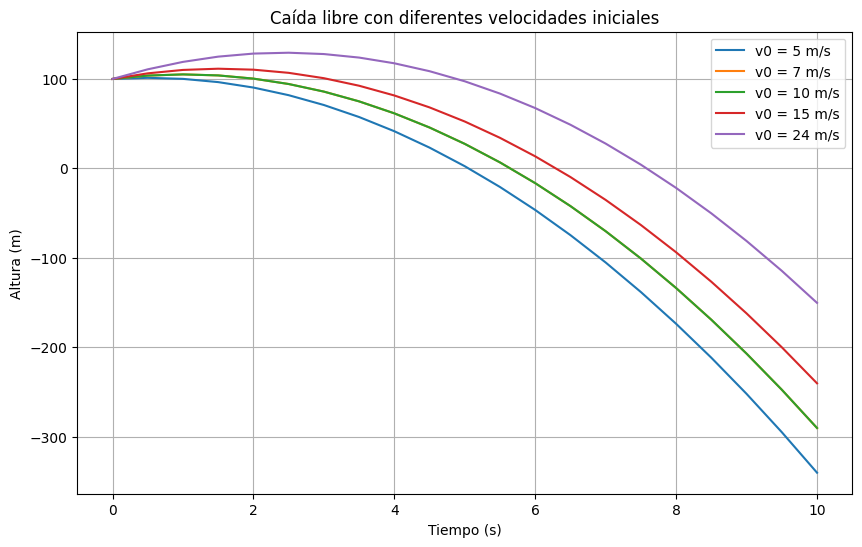

In [21]:
import matplotlib.pyplot as plt

# Graficamos todas las columnas excepto la de tiempo
plt.figure(figsize=(10,6))

plt.plot(caida_libre["t (s)"], caida_libre["v_0 (5 m/s)"], label="v0 = 5 m/s")
plt.plot(caida_libre["t (s)"], caida_libre["v_1 (7 m/s)"], label="v0 = 7 m/s")
plt.plot(caida_libre["t (s)"], caida_libre["v_2 (10 m/s)"], label="v0 = 10 m/s")
plt.plot(caida_libre["t (s)"], caida_libre["v_3 (15 m/s)"], label="v0 = 15 m/s")
plt.plot(caida_libre["t (s)"], caida_libre["v_4 (24 m/s)"], label="v0 = 24 m/s")

# Detalles de la gráfica
plt.title("Caída libre con diferentes velocidades iniciales")
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")
plt.legend()
plt.grid(True)

# Mostrar
plt.show()


### 4. Crea una clase llamada **Particula** con los atributos `masa`, `posición`, `velocidad`

Agrega un método `energia_cinetica()` que calcule la energía cinética de la partícula, de acuerdo con:

$
E_k = \tfrac{1}{2} m v^2
$

Crea 4 partículas con diferentes masas, posiciones y velocidades.  

Implementa una función que reciba como entrada un número indeterminado de partículas, compare sus energías cinéticas e imprima los atributos de la partícula con mayor energía cinética, así como el valor de esta energía.  


In [ ]:
class Particula:
    """
    Represents a physical particle with mass, position, and velocity.
    
    This class models a classical particle in Newtonian mechanics with
    methods to compute its kinetic energy and access its properties.
    
    Attributes:
        __masa (float): Mass of the particle (kg). Private attribute.
        __posicion (float): Position coordinate of the particle (m). Private attribute.
        __velocidad (float): Velocity of the particle (m/s). Private attribute.
        
    Note:
        All attributes are private (name mangling with __) to enforce
        encapsulation and prevent direct external modification.
    """

    def __init__(self, masa: float, posicion: float, velocidad: float):
        """
        Initialize a new Particula instance.

        Args:
            masa (float): Mass of the particle (kg). Must be positive.
            posicion (float): Initial position coordinate (m).
            velocidad (float): Initial velocity (m/s).
        """
        self.__masa = masa
        self.__posicion = posicion
        self.__velocidad = velocidad

    def get_properties(self) -> dict:
        """
        Retrieve all particle properties as a dictionary.

        Returns:
            dict: Dictionary containing particle attributes:
                  - 'masa': mass in kg
                  - 'posición': position in m
                  - 'velocidad': velocity in m/s
        """
        return {
            "masa": self.__masa, 
            "posición": self.__posicion, 
            "velocidad": self.__velocidad
        }
    
    def get_kinetic_energy(self) -> float:
        """
        Calculate the kinetic energy of the particle.
        
        Uses the classical Newtonian kinetic energy formula.
        
        Returns:
            float: Kinetic energy in Joules (kg⋅m²/s²).
            
        Formula:
            Eₖ = ½mv²
            
            Where:
            - m: mass of the particle
            - v: velocity of the particle
            
        Physical Meaning:
            Kinetic energy represents the work needed to accelerate
            the particle from rest to its current velocity.
        """
        return 0.5 * self.__masa * (self.__velocidad ** 2)

In [23]:
# Instanciamoss 4 particulas con valores aleatorios
particula_1 = Particula(masa=0.1, posicion=20, velocidad=30)
particula_2 = Particula(masa=5, posicion=0.1, velocidad=20)
particula_3 = Particula(masa=0.7, posicion=90, velocidad=300)
particula_4 = Particula(masa=10, posicion=10, velocidad=88)

In [ ]:
def max_energy(particulas: list) -> None:
    """
    Identify and display the particle with maximum kinetic energy.
    
    Analyzes a collection of Particula objects to find the one with
    the highest kinetic energy and prints its complete properties.

    Args:
        particulas (list[Particula]): List of Particula instances to analyze.
        
    Returns:
        None: Results are printed to standard output.
        
    Algorithm:
        1. Extract kinetic energy from each particle
        2. Find maximum energy using my_max() function
        3. Identify particle with maximum energy
        4. Display particle properties and energy value
        
    Output Format:
        Prints: "La particula con mayor energia es: {properties}, E = {energy} kg⋅m²/s²"
        
    Example:
        >>> particles = [Particula(1, 0, 10), Particula(2, 5, 5)]
        >>> max_energy(particles)
        La particula con mayor energia es: {...}, E = 50.0 kg⋅m²/s²
    """
    # Collect kinetic energies from all particles
    energias = []
    for particula in particulas:
        energia_cinetica = particula.get_kinetic_energy()
        energias.append(energia_cinetica)

    # Find maximum kinetic energy
    max_k_e = my_max(energias)
    
    # Identify particle with maximum energy
    max_particle = particulas[energias.index(max_k_e)]

    # Display results
    print(f"La particula con mayor energia es: {max_particle.get_properties()}, "
          f"E = {max_particle.get_kinetic_energy()} kg⋅m²/s²")

In [30]:
max_energy([particula_1, particula_2, particula_3, particula_4])

La particula con mayor energia es: {'masa': 10, 'posición': 10, 'velocidad': 88}, E = 38720.0 Kgm^2/s^2


### 5. Escribe una función en Python que realice el producto de una matriz por un vector:

$
\vec{b} = \mathbf{A}\,\vec{x} =
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
\vdots  & \ddots  &        & \vdots  \\
a_{n,1} & a_{n,2} & \cdots & a_{n,n} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
\vdots \\
x_{n} \\
\end{bmatrix}
=\begin{bmatrix}
a_{1,1}x_{1} + a_{1,2}x_{2} + \cdots + a_{1,n}x_{n} \\
\vdots \\
a_{n,1}x_{1} + a_{n,2}x_{2} + \cdots + a_{n,n}x_{n} \\
\end{bmatrix}
$

La representación de la matriz en Python está dada por listas anidadas.  
Por ejemplo, la matriz identidad de dimensión 3 puede escribirse como:

```python
A = [[1,0,0],
     [0,1,0],
     [0,0,1]]

y se puede acceder a cada entrada mediante la operación A[i][j], en donde i es el renglón y j la columna.

In [ ]:
def mat_vec_product(A: list[list[float]], x: list[float]) -> list[float]:
    """
    Compute the matrix-vector product b = A·x.
    
    Implements standard matrix-vector multiplication from linear algebra
    without using external libraries like NumPy.

    Args:
        A (list[list[float]]): Square matrix of dimension n×n.
                               Represented as list of row vectors.
        x (list[float]): Column vector of dimension n.

    Returns:
        list[float]: Resulting vector b = A·x of dimension n.
        
    Mathematical Definition:
        For matrix A and vector x:
        
        bᵢ = Σⱼ aᵢⱼ xⱼ  (for i = 1 to n)
        
        Each component of result vector b is the dot product
        of the corresponding row of A with vector x.
        
    Algorithm:
        1. Initialize result vector b with zeros
        2. For each row i of matrix A:
           a. Compute dot product of row i with vector x
           b. Store result in bᵢ
        3. Return resulting vector b
        
    Complexity:
        Time: O(n²) for n×n matrix
        Space: O(n) for result vector
        
    Example:
        >>> A = [[1, 0], [0, 1]]  # 2×2 identity matrix
        >>> x = [3, 4]
        >>> mat_vec_product(A, x)
        [3.0, 4.0]  # I·x = x (identity property)
        
    Note:
        Function assumes A is square and dimensions are compatible.
        No validation is performed for performance reasons.
    """
    # Get matrix dimension
    n = len(A)
    
    # Initialize result vector with zeros
    b = [0.0] * n
    
    # Compute matrix-vector product
    for i in range(n):  # Iterate over rows of A
        suma = 0.0
        for j in range(n):  # Iterate over columns of A
            suma += A[i][j] * x[j]
        b[i] = suma
    
    return b


In [ ]:
# Matriz identidad 3x3
A = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]

# Vector
x = [1, 2, 3]

# Producto A·x = x
resultado = mat_vec_product(A, x)
print("Resultado:", resultado)


Resultado: [1.0, 2.0, 3.0]
